In [1]:
import tensorflow as tf
from tensorflow.keras.datasets.fashion_mnist import load_data
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras import models
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.utils import plot_model

from sklearn.model_selection import train_test_split

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plot
plt.style.use('seaborn-white')

In [2]:
tf.random.set_seed(111)

(x_train_full, y_train_full), (x_test, y_test) = load_data()

x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full, test_size=0.3, random_state=111)

In [3]:
print('학습 데이터: {}\t레이블: {}'.format(x_train_full.shape, y_train_full.shape))
print('학습 데이터: {}\t레이블: {}'.format(x_train.shape, y_train.shape))
print('학습 데이터: {}\t레이블: {}'.format(x_val.shape, y_val.shape))
print('학습 데이터: {}\t레이블: {}'.format(x_test.shape, y_test.shape))

학습 데이터: (60000, 28, 28)	레이블: (60000,)
학습 데이터: (42000, 28, 28)	레이블: (42000,)
학습 데이터: (18000, 28, 28)	레이블: (18000,)
학습 데이터: (10000, 28, 28)	레이블: (10000,)


In [4]:
class_name = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [5]:
class_name[y_train[0]]

'Pullover'

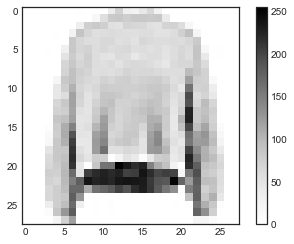

In [6]:
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

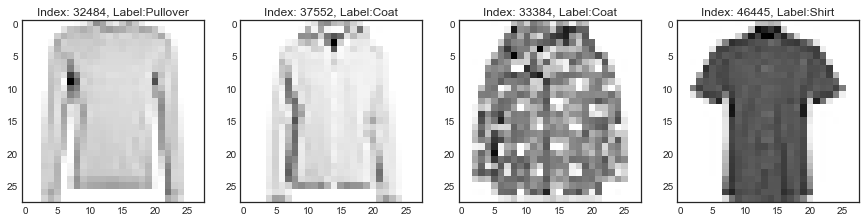

In [7]:
num_sample = 4

random_idxs = np.random.randint(60000, size=num_sample)

plt.figure(figsize=(15,10))
for i, idx in enumerate(random_idxs):
    image = x_train_full[idx, :]
    label = y_train_full[idx]
    
    plt.subplot(1, len(random_idxs), i+1)
    plt.imshow(image)
    plt.title('Index: {}, Label:{}'.format(idx, class_name[label]))

In [8]:
x_train = (x_train.reshape(-1, 28*28)) / 255.
x_val = (x_val.reshape(-1, 28*28)) / 255.
x_test = (x_test.reshape(-1, 28*28)) / 255.

In [9]:
input = Input(shape=(784,), name='input')
hidden1 = Dense(256, activation='relu', name='hidden1')(input)
hidden2 = Dense(128, activation='relu', name='hidden2')(hidden1)
hidden3 = Dense(64, activation='relu', name='hidden3')(hidden2)
hidden4 = Dense(32, activation='relu', name='hidden4')(hidden3)
output = Dense(10, activation='softmax', name='output')(hidden4)
model = Model(inputs=[input], outputs=output)


In [10]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 784)]             0         
                                                                 
 hidden1 (Dense)             (None, 256)               200960    
                                                                 
 hidden2 (Dense)             (None, 128)               32896     
                                                                 
 hidden3 (Dense)             (None, 64)                8256      
                                                                 
 hidden4 (Dense)             (None, 32)                2080      
                                                                 
 output (Dense)              (None, 10)                330       
                                                                 
Total params: 244,522
Trainable params: 244,522
Non-trainable

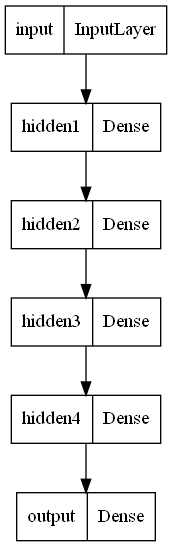

In [11]:
plot_model(model)

In [12]:
model.compile(loss='sparse_categorical_crossentropy', optimizer=RMSprop(learning_rate=0.01),metrics=['acc'])

In [13]:
history = model.fit(x_train, y_train,epochs=10, batch_size=128, validation_data=(x_val, y_val))

Epoch 1/10
329/329 [==============================] - 4s 9ms/step - loss: 0.9736 - acc: 0.6997 - val_loss: 0.6158 - val_acc: 0.7782
Epoch 2/10
329/329 [==============================] - 3s 8ms/step - loss: 0.5353 - acc: 0.8094 - val_loss: 0.6483 - val_acc: 0.7673
Epoch 3/10
329/329 [==============================] - 3s 8ms/step - loss: 0.4845 - acc: 0.8287 - val_loss: 0.4959 - val_acc: 0.8333
Epoch 4/10
329/329 [==============================] - 2s 7ms/step - loss: 0.4619 - acc: 0.8397 - val_loss: 0.6526 - val_acc: 0.7532
Epoch 5/10
329/329 [==============================] - 3s 8ms/step - loss: 0.4510 - acc: 0.8451 - val_loss: 0.5305 - val_acc: 0.8421
Epoch 6/10
329/329 [==============================] - 2s 7ms/step - loss: 0.4400 - acc: 0.8481 - val_loss: 0.5310 - val_acc: 0.8061
Epoch 7/10
329/329 [==============================] - 2s 7ms/step - loss: 0.4413 - acc: 0.8505 - val_loss: 0.5836 - val_acc: 0.7856
Epoch 8/10
329/329 [==============================] - 2s 8ms/step - loss: 0.

In [14]:
history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

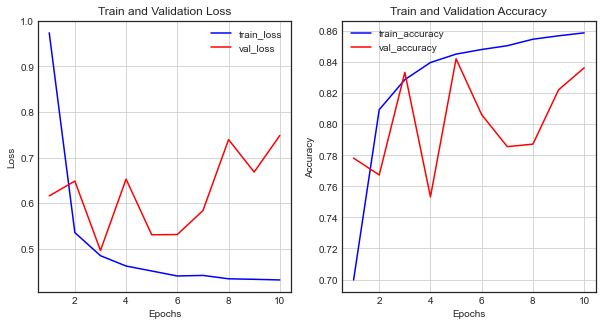

In [17]:
history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss)+1)
fig = plt.figure(figsize=(10, 5))

ax1 = fig.add_subplot(1,2,1)
ax1.plot(epochs, loss, color='blue', label='train_loss')
ax1.plot(epochs, val_loss, color='red', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

acc = history_dict['acc']
val_acc = history_dict['val_acc']


ax2 = fig.add_subplot(1,2,2)
ax2.plot(epochs, acc, color='blue', label='train_accuracy')
ax2.plot(epochs, val_acc, color='red', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

In [18]:
from tensorflow.keras.optimizers import SGD

In [23]:
model.compile(loss='sparse_categorical_crossentropy', optimizer=SGD(learning_rate=0.01), metrics=['acc'])

In [24]:
history2 = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_val, y_val))

Epoch 1/10
329/329 [==============================] - 3s 7ms/step - loss: 0.3421 - acc: 0.8810 - val_loss: 0.4283 - val_acc: 0.8692
Epoch 2/10
329/329 [==============================] - 2s 5ms/step - loss: 0.3196 - acc: 0.8858 - val_loss: 0.4275 - val_acc: 0.8721
Epoch 3/10
329/329 [==============================] - 2s 5ms/step - loss: 0.3149 - acc: 0.8864 - val_loss: 0.4137 - val_acc: 0.8734
Epoch 4/10
329/329 [==============================] - 2s 5ms/step - loss: 0.3098 - acc: 0.8874 - val_loss: 0.4201 - val_acc: 0.8718
Epoch 5/10
329/329 [==============================] - 2s 5ms/step - loss: 0.3078 - acc: 0.8880 - val_loss: 0.4115 - val_acc: 0.8747
Epoch 6/10
329/329 [==============================] - 2s 5ms/step - loss: 0.3055 - acc: 0.8881 - val_loss: 0.4106 - val_acc: 0.8751
Epoch 7/10
329/329 [==============================] - 2s 5ms/step - loss: 0.3043 - acc: 0.8885 - val_loss: 0.4137 - val_acc: 0.8724
Epoch 8/10
329/329 [==============================] - 2s 5ms/step - loss: 0.

In [26]:
history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

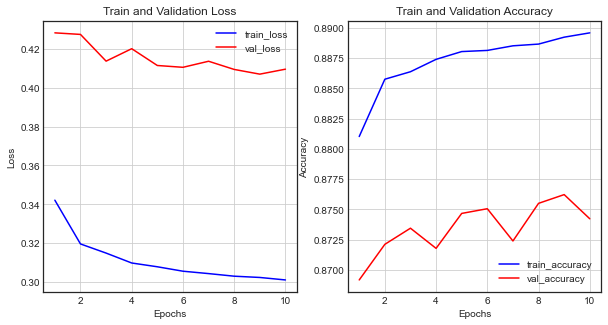

In [27]:
history_dict = history2.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss)+1)
fig = plt.figure(figsize=(10, 5))

ax1 = fig.add_subplot(1,2,1)
ax1.plot(epochs, loss, color='blue', label='train_loss')
ax1.plot(epochs, val_loss, color='red', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

acc = history_dict['acc']
val_acc = history_dict['val_acc']


ax2 = fig.add_subplot(1,2,2)
ax2.plot(epochs, acc, color='blue', label='train_accuracy')
ax2.plot(epochs, val_acc, color='red', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

In [28]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.4165 - acc: 0.8655


[0.4164698123931885, 0.8654999732971191]

In [29]:
pred_ys = model.predict(x_test)

print(pred_ys.shape)
np.set_printoptions(precision=7)
print(pred_ys[0])

(10000, 10)
[6.0428087e-30 1.4726253e-28 1.6245045e-35 3.2129160e-28 2.0787493e-34
 3.0012694e-01 5.8512759e-26 2.7267408e-02 6.1901406e-13 6.7260563e-01]


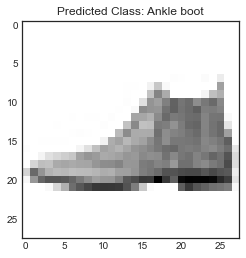

In [30]:
arg_pred_y= np.argmax(pred_ys, axis=1)

plt.imshow(x_test[0].reshape(-1, 28))
plt.title('Predicted Class: {}'.format(class_name[arg_pred_y[0]]))
plt.show()

In [39]:
def plot_image(i, pred_ys, y_test, img):
    pred_ys, y_test, img=pred_ys[i], y_test[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img, cmap=plt.cm.binary)
    
    predicted_label = np.argmax(pred_ys)
    if predicted_label == y_test:
        color = 'blue'
    else:
        color = 'red'
        
    plt.xlabel('{} {:2.0f}% ({})'.format(class_name[predicted_label], 100*np.max(pred_ys), class_name[y_test]), color=color)
               
def plot_value_array(i, pred_ys, true_label):
    pred_ys, true_label = pred_ys[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), pred_ys, color='#777777')
    plt.ylim([0,1])
    predicted_label = np.argmax(pred_ys)
    
    thisplot[predicted_label].set_color('red') 
    thisplot[true_label].set_color('blue')
    
              

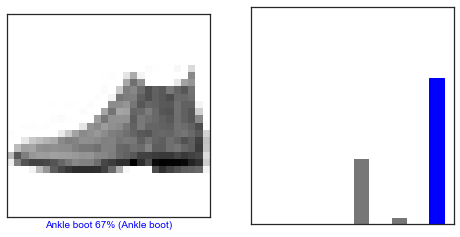

In [40]:
i =0
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plot_image(i, pred_ys, y_test, x_test.reshape(-1,28,28))
plt.subplot(1,2,2)
plot_value_array(i, pred_ys, y_test)
plt.show()

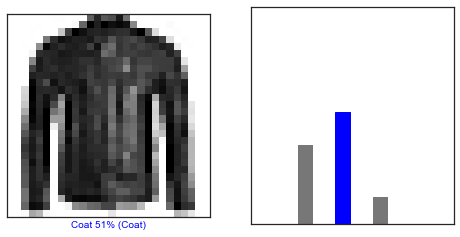

In [43]:
i = 50
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plot_image(i, pred_ys, y_test, x_test.reshape(-1,28,28))
plt.subplot(1,2,2)
plot_value_array(i, pred_ys, y_test)
plt.show()

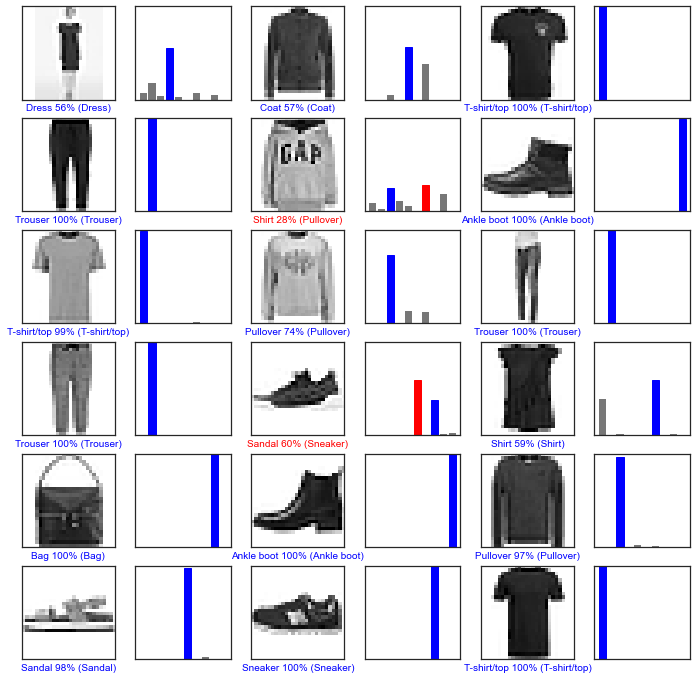

In [45]:
num_rows = 6
num_cols = 3
num_images = num_rows*num_cols

random_num = np.random.randint(10000, size=num_images)
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for idx, num in enumerate(random_num):
    plt.subplot(num_rows, 2*num_cols, 2*idx+1)
    plot_image(num, pred_ys, y_test, x_test.reshape(-1,28,28))
    plt.subplot(num_rows, 2*num_cols, 2*idx+2)
    plot_value_array(num, pred_ys, y_test)
    
plt.show()

In [46]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
sns.set(style='white')

from tensorflow.keras.utils import to_categorical

In [47]:
y_test_che = to_categorical(y_test)
y_test_che.shape

(10000, 10)

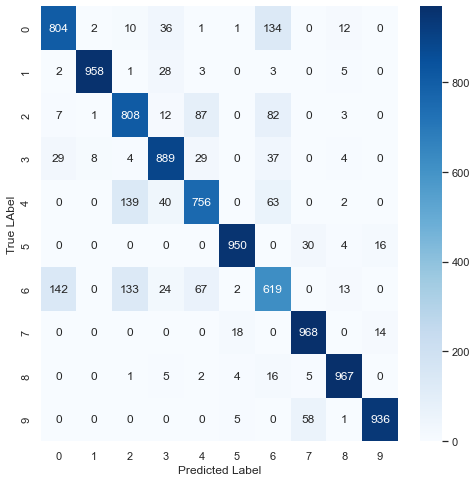

In [48]:
plt.figure(figsize=(8,8))

cm2 = confusion_matrix(np.argmax(y_test_che, axis=-1), np.argmax(pred_ys, axis=-1))
sns.heatmap(cm2, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True LAbel')
plt.show()

In [50]:
print(classification_report(np.argmax(y_test_che, axis=-1), np.argmax(pred_ys, axis=-1)))

              precision    recall  f1-score   support

           0       0.82      0.80      0.81      1000
           1       0.99      0.96      0.97      1000
           2       0.74      0.81      0.77      1000
           3       0.86      0.89      0.87      1000
           4       0.80      0.76      0.78      1000
           5       0.97      0.95      0.96      1000
           6       0.65      0.62      0.63      1000
           7       0.91      0.97      0.94      1000
           8       0.96      0.97      0.96      1000
           9       0.97      0.94      0.95      1000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000

